In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [3]:
galton = Table.read_table('galton.csv')

In [4]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


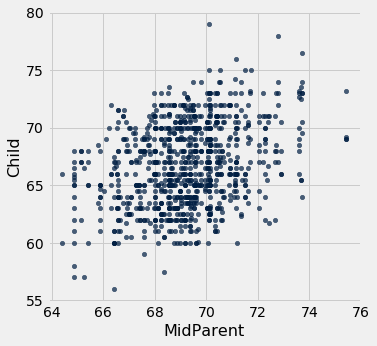

In [5]:
heights.scatter('MidParent')

In [6]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.25 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [7]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

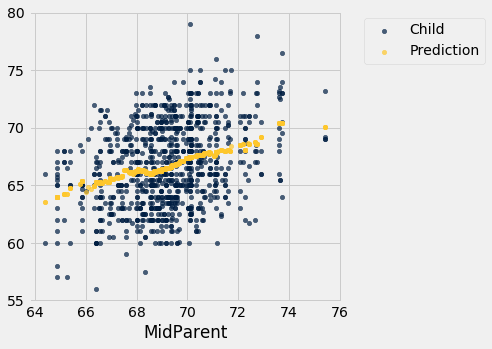

In [8]:
heights_with_predictions.scatter('MidParent')

In [9]:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [10]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


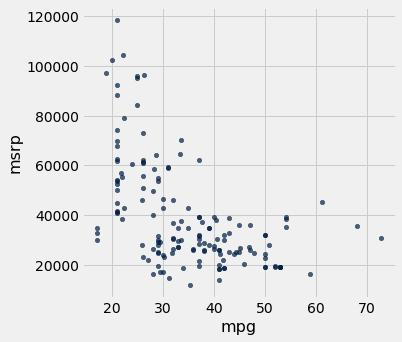

In [11]:
hybrid.scatter('mpg', 'msrp')

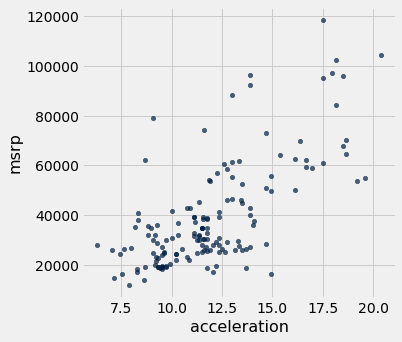

In [12]:
hybrid.scatter('acceleration', 'msrp')

In [13]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

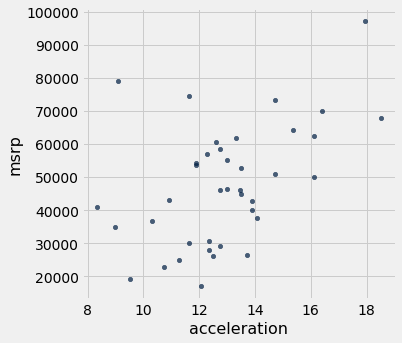

In [14]:
suv.scatter('acceleration', 'msrp')

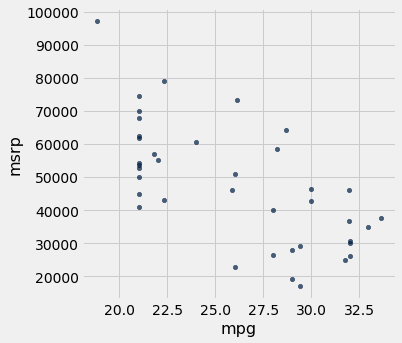

In [15]:
suv.scatter('mpg', 'msrp')

In [16]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x)  

In [17]:
suv = suv.with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp')),
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
)
suv

vehicle,year,msrp,acceleration,mpg,class,mpg (standard units),msrp (standard units),acceleration (standard units)
Escape,2004,36676.1,10.32,31.99,SUV,1.31784,-0.60884,-1.16157
Lexus RX400h,2005,58521.1,12.76,28.23,SUV,0.48955,0.605991,-0.0718039
Highlander,2005,29186.2,12.76,29.4,SUV,0.747288,-1.02536,-0.0718039
Escape 2WD,2005,19322.6,9.52,29,SUV,0.659172,-1.57389,-1.51888
Mercury Mariner,2006,34772.4,8.98,32.93,SUV,1.52491,-0.714707,-1.76005
Chevrolet Tahoe,2007,42924.3,10.91,22.35,SUV,-0.805749,-0.261367,-0.898064
Kluger,2007,46229.5,12.76,25.87,SUV,-0.0303321,-0.0775641,-0.0718039
Tribute,2007,24823.8,11.28,31.75,SUV,1.26497,-1.26796,-0.732812
GMC Yukon,2007,57094.8,12.28,21.78,SUV,-0.931314,0.526671,-0.286185
Vue,2007,22938.3,10.75,26,SUV,-0.00169453,-1.37281,-0.969524


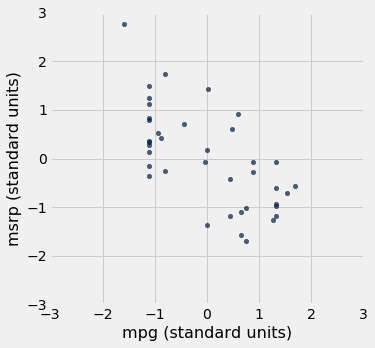

In [18]:
suv.scatter('mpg (standard units)', 'msrp (standard units)')
plots.xlim(-3, 3)
plots.ylim(-3, 3);

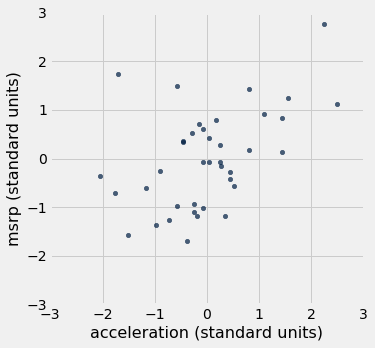

In [19]:
suv.scatter('acceleration (standard units)', 'msrp (standard units)')
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [20]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


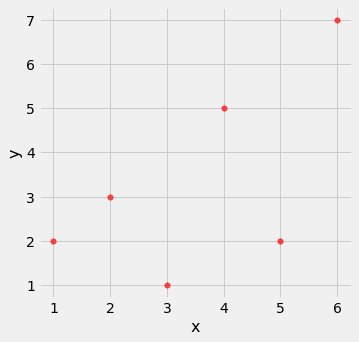

In [21]:
t.scatter('x', 'y', s=30, color='red')

In [22]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


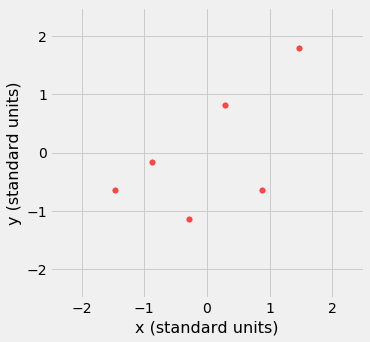

In [23]:
t.scatter('x (standard units)', 'y (standard units)', s=30, color='red')
plots.xlim(-2.5, 2.5)
plots.ylim(-2.5, 2.5);

In [24]:
x_std_units = t.column('x (standard units)')
y_std_units = t.column('y (standard units)')
t = t.with_column(
    'product of standard units', x_std_units * y_std_units)
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [25]:
# r is the average of the products of standard units
r = np.mean(t.column('product of standard units'))
r

0.61741639718977093

In [26]:
def correlation(t, label_x, label_y):
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    return np.mean(x_in_standard_units * y_in_standard_units)

In [27]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [28]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

In [29]:
correlation(t, 'x', 'y')

0.61741639718977093

In [30]:
correlation(t, 'y', 'x')

0.61741639718977093

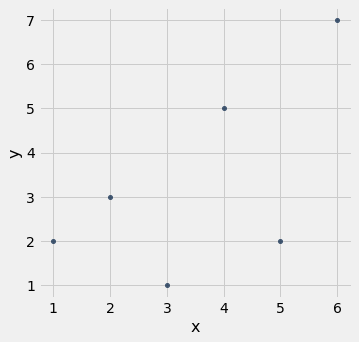

In [31]:
t.scatter('x', 'y')

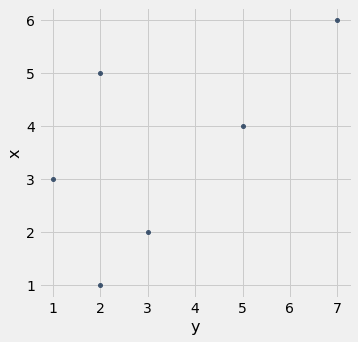

In [32]:
t.scatter('y', 'x')

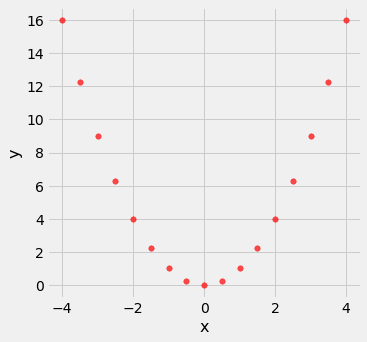

In [33]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [34]:
correlation(nonlinear, 'x', 'y')

0.0

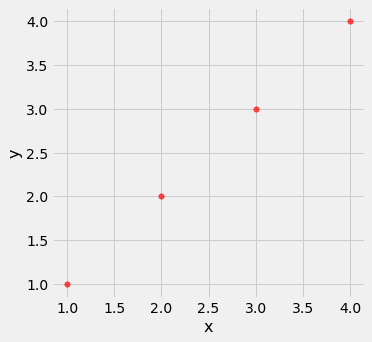

In [35]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [36]:
correlation(line, 'x', 'y')

1.0

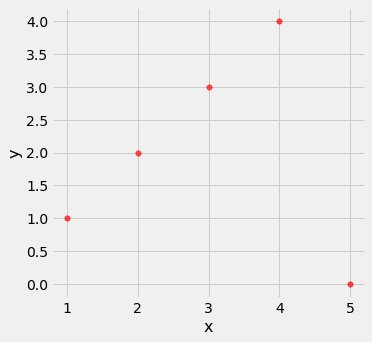

In [37]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [38]:
correlation(outlier, 'x', 'y')

0.0

In [39]:
by_state = Table.read_table('election2016_state.csv')
by_state

State,Median Income,Percent voting for Clinton
Alabama,47221,0.343579
Alaska,75723,0.365509
Arizona,57100,0.45126
Arkansas,45907,0.336519
California,66637,0.617264
Colorado,70566,0.481565
Connecticut,75923,0.545663
Delaware,58046,0.53086
Florida,51176,0.478233
Georgia,53527,0.4564


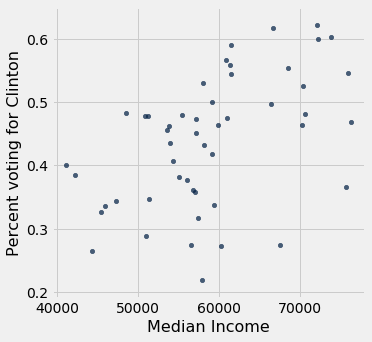

In [40]:
by_state.scatter('Median Income', 'Percent voting for Clinton')

In [41]:
party = Table.read_table('party_affiliation2016.csv')
party

Income,Republican%,Democrat%,No leaning%
"Below 30,000",32,60,8
"30,000 to 39,999",47,46,7
"50,000 to 74,999",49,44,6
"75,000 to 99,999",48,44,8
"40,000 to 49,999",47,46,7
"100,000 to 149,999",51,45,4
"Above 150,000",46,48,6


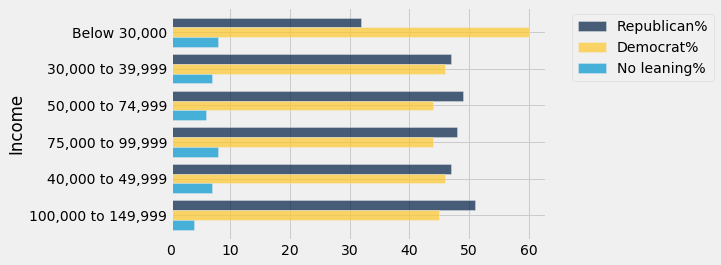

In [42]:
party.exclude(6).barh('Income')

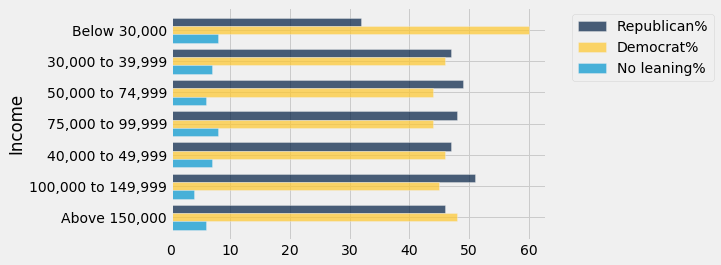

In [43]:
party.barh('Income')

In [44]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

FileNotFoundError: File b'sat2014.csv' does not exist

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

In [ ]:
by_district = Table.read_table('election2016_district.csv')
by_district

In [ ]:
by_district.scatter('Median Income', 'Percent voting for Clinton')